In [515]:
! pip install imblearn

In [516]:
import pandas as pd
import numpy as np

from matplotlib import figure
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, accuracy_score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

diabetesds = pd.read_csv('diabetes_prediction_dataset.csv')

# Imbalanced-learn : using the oversampler

Precision: It measures the proportion of correctly predicted positive instances out of all instances predicted as positive. It indicates how precise the classifier is when it predicts the positive class.

Recall: Also known as sensitivity or true positive rate, it measures the proportion of correctly predicted positive instances out of all actual positive instances. It indicates the ability of the classifier to find all positive instances.

F1-score: It is the harmonic mean of precision and recall. It provides a single metric that combines both precision and recall. F1-score is useful when you want to balance precision and recall.

Support: It represents the number of samples in each class.

In [517]:
diabetesds.shape

(100000, 9)

In [518]:
diabetesds.sample(20)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
40804,Male,24.0,0,0,No Info,27.32,4.8,159,0
8568,Female,48.0,0,0,No Info,23.40,6.2,80,0
52584,Male,47.0,0,0,never,27.07,6.5,130,0
70329,Female,80.0,0,0,No Info,27.32,6.2,90,0
38664,Female,58.0,1,0,former,27.32,3.5,126,0
94585,Male,67.0,0,1,never,24.22,6.2,126,1
59199,Male,16.0,0,0,No Info,22.37,3.5,160,0
4605,Male,45.0,0,0,never,28.73,6.5,130,0
23976,Female,65.0,0,0,never,24.12,3.5,160,0
52566,Male,61.0,1,1,never,30.28,6.2,158,0


***

## Diabetes modeling and predicting

***
### 1. Desicion tree 

We first start with creating a desicion tree. And print the accuracy of our model. As we can see it's pretty high

In [519]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the decision tree classifier
classifier = DecisionTreeClassifier()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the testing data
predictions = classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.955


***
### 2. Grid search

Second step is doing a grid search. We use logistic regression because our dependent variable is categorical ( can only be diabetes, or no diabetes ). Here aswell we have a pretty high accuracy score.

In [520]:
classifier = LogisticRegression()

# Define the hyperparameters and their possible values for the grid search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 5, 10.0],
    'solver': ['liblinear', 'saga']
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Use the best model for predictions
predictions = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

/Users/alex/opt/anaconda3/envs/DataAnalytics/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alex/opt/anaconda3/envs/DataAnalytics/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alex/opt/anaconda3/envs/DataAnalytics/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alex/opt/anaconda3/envs/DataAnalytics/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alex/opt/anaconda3/envs/DataAnalytics/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the 

Accuracy: 0.895


/Users/alex/opt/anaconda3/envs/DataAnalytics/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alex/opt/anaconda3/envs/DataAnalytics/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alex/opt/anaconda3/envs/DataAnalytics/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alex/opt/anaconda3/envs/DataAnalytics/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alex/opt/anaconda3/envs/DataAnalytics/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the 

***
### 3. Confusion Matrix

next step is looking at the confusion matrix. Just because our accuracy is good does not mean the predictions are accurate. With the onfusion matrix we can asses a more detailed evaluation of the performance. 

As we can see 173 of the predicted non-diabetics are correct. 7 are wrongly predicted positive.
The true negatives (diabetics) 6, and the falsly predicted diabetics are 14.

[[173   7]
 [ 14   6]]


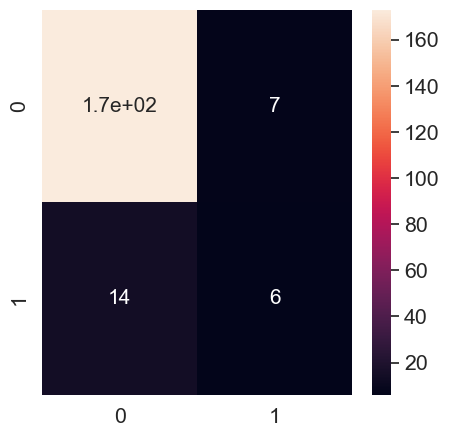

In [521]:
from sklearn.metrics import confusion_matrix

classifier.fit(X_train, y_train)

# Assuming you have the true labels (y_true) and predicted labels (y_pred)
predictions = classifier.predict(X_test)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, predictions)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(confusion, annot = True, annot_kws = {"size": 15})

print(confusion)


This is a pretty bad prediction because 14 people were told they didnt have diabetes on a false prediction. which is worse then the 7 people that where told they had diabetes but actually did not. This consideration is very important for making predictions. The reason behind this is that people who did have diabetes but didnt know would die from not getting the medical help they needed. The people who did get predicted as diabetic but actually didnt have diabetes will live.
*** 

### ROC Curve

The ROC ( receiver operating characteristic ) adds extra value to the confusion matrix by provinding a visual representation of the confusion matrix. by assesing the confusion matrix and the ROC we can make better desicions by looking at the performance.

From looking at the vizualisation we can conclude if the performance of the classifier is good. The more the curve goes to the top left corner the better. So, from our vizualisation we can see that our performance is pretty good. 

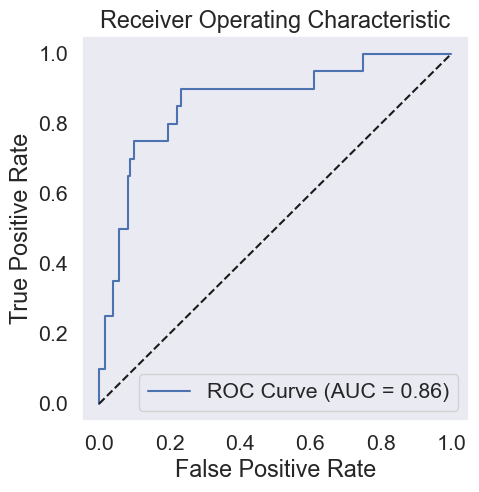

In [522]:
from sklearn.metrics import roc_auc_score, roc_curve


probas = classifier.predict_proba(X_test)
probas = probas[:, 1]  # Keep probabilities of the positive class

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probas)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, probas)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

***

## Imbalanced learn

***
To make our model better 

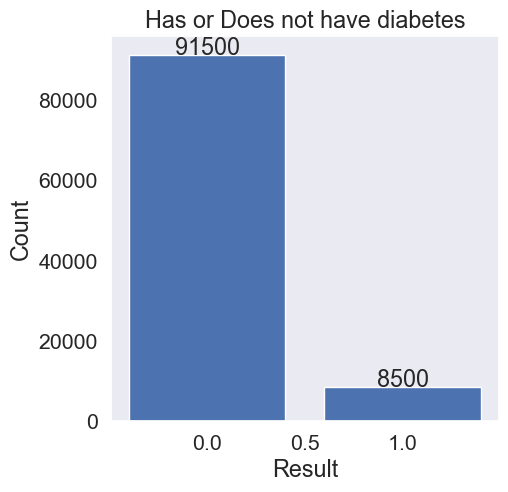

In [524]:
value_counts = diabetesds['diabetes'].value_counts()

plt.bar(value_counts.index, value_counts.values)
#show amount of 0,1
for i, count in enumerate(value_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center')

plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Has or Does not have diabetes')

plt.show()

1 indicating diabetes, 0 indicating no diabetes. 

Before using the undersampler to equalize the amount of samples.

In [525]:
X, y = make_classification(n_samples=1000, weights=[0.9, 0.1], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

classifier = LogisticRegression()
classifier.fit(X_train_resampled, y_train_resampled)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       180
           1       0.39      0.75      0.52        20

    accuracy                           0.86       200
   macro avg       0.68      0.81      0.72       200
weighted avg       0.91      0.86      0.88       200



This piece of information shows you that the precision and recall for 0 (people wihtout diabetes) is pretty good. As we have proven above, this is the majority class. The minority class 1 (people with diabetes) has weaker predictions. Which means out of all instances predicted as 1 only 39% was right. 
***
Using the undersampler now getting the same amount of samples for the minority class as the majority class.

In [530]:
rus = RandomUnderSampler(random_state=42)

X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

classifier.fit(X_train_undersampled, y_train_undersampled)

y_pred = classifier.predict(X_train_undersampled)
print(classification_report(y_train_undersampled, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        83
           1       0.90      0.90      0.90        83

    accuracy                           0.90       166
   macro avg       0.90      0.90      0.90       166
weighted avg       0.90      0.90      0.90       166



Lets see the difference between these correlation matrixes

[[173   7]
 [ 14   6]]

[[148  32]
 [  5  15]]


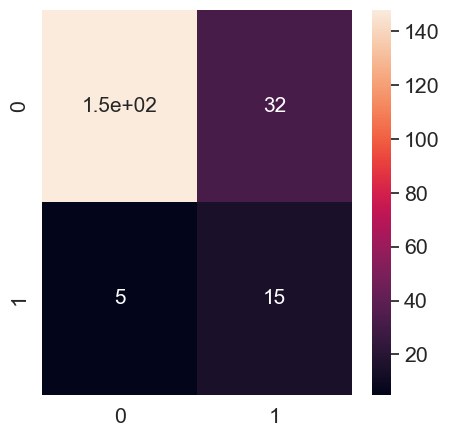

In [531]:
classifier.fit(X_train_undersampled, y_train_undersampled)

# Assuming you have the true labels (y_true) and predicted labels (y_pred)
predictions = classifier.predict(X_test)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, predictions)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(confusion, annot = True, annot_kws = {"size": 15})

print(confusion)

Based on these confusionmatrixes i can conclude that the one we equalized has a higher precision and recall. While the imbalanced sample has a better performance.

In [551]:
# Define the parameter grid
param_grid =  {    'criterion': ['gini', 'entropy'],
    'min_samples_split': [5, 10 ,20, 25, 30, 40, 50],
    'min_samples_leaf': [1, 2, 3, 4 , 5 ,],}   
# Create a decision tree classifier
model = DecisionTreeClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameter and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [552]:
print(best_score)
print(best_params)

0.9662499999999999
{'criterion': 'entropy', 'min_samples_leaf': 3, 'min_samples_split': 30}


# Overviews:
***

Now lets put everything together. My idea is to show you the performance of the different models we created. First we see the undersampled one. 
Underneath is the correctly sampled one.

The AUC can indicate that your model can differentiate between the two classes. The higher the AUC the more effective it can differentiate.

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
Accuracy: 0.735
Precision: 0.22950819672131148
Recall: 0.7
Confusion Matrix:
[[133  47]
 [  6  14]]
AUC: 0.7194444444444444


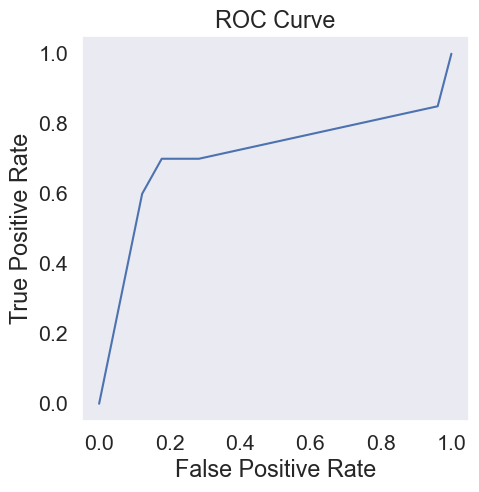

In [557]:
from sklearn.metrics import precision_score, recall_score

param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

classifier = DecisionTreeClassifier()

 #gridsearch
grid_search = GridSearchCV(classifier, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_undersampled, y_train_undersampled)
best_params = grid_search.best_params_

 #performance
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(confusion_mat)
print("AUC:", auc)


best_model = grid_search.best_estimator_
 
 #ROC curve
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

***
equally sampled model

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Accuracy: 0.965
Precision: 0.9333333333333333
Recall: 0.7
Confusion Matrix:
[[179   1]
 [  6  14]]
AUC: 0.8472222222222222


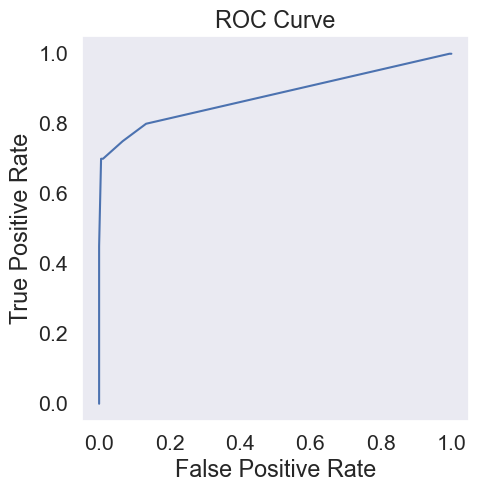

In [553]:
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

classifier = DecisionTreeClassifier()
grid_search = GridSearchCV(classifier, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(confusion_mat)
print("AUC:", auc)

best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## now lets evaluate them

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
Accuracy: 0.735
Precision: 0.22950819672131148
Recall: 0.7
Confusion Matrix:
[[133  47]
 [  6  14]]
AUC: 0.7194444444444444

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Accuracy: 0.965
Precision: 0.9333333333333333
Recall: 0.7
Confusion Matrix:
[[179   1]
 [  6  14]]
AUC: 0.8472222222222222

***
In Accuracy, Precision and AUC the equal sample is for sure the better one. The confusion matrix shows that the equal sample shows less false positives and more true positives. When I look at these numbers it is clear that the equalized sample is the best option.